In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier ,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Problem Statement

1.battery_power -
2.blue          -
3.clock_speed   -
4.dual_sim      -
5.fc            -
6.four_g        -
7.int_memory    -
8.m_dep         -
9.mobile_wt     -
10.n_cores      -
11.pc           -
12.px_height    -
13.touch_screen -
14.wifi         - 
15.price_range  -


In this problem you do not have to predict actual price but a price range indicating how high the price is

### Data Dathering

In [6]:
df = pd.read_csv('train.csv')
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

### EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [10]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

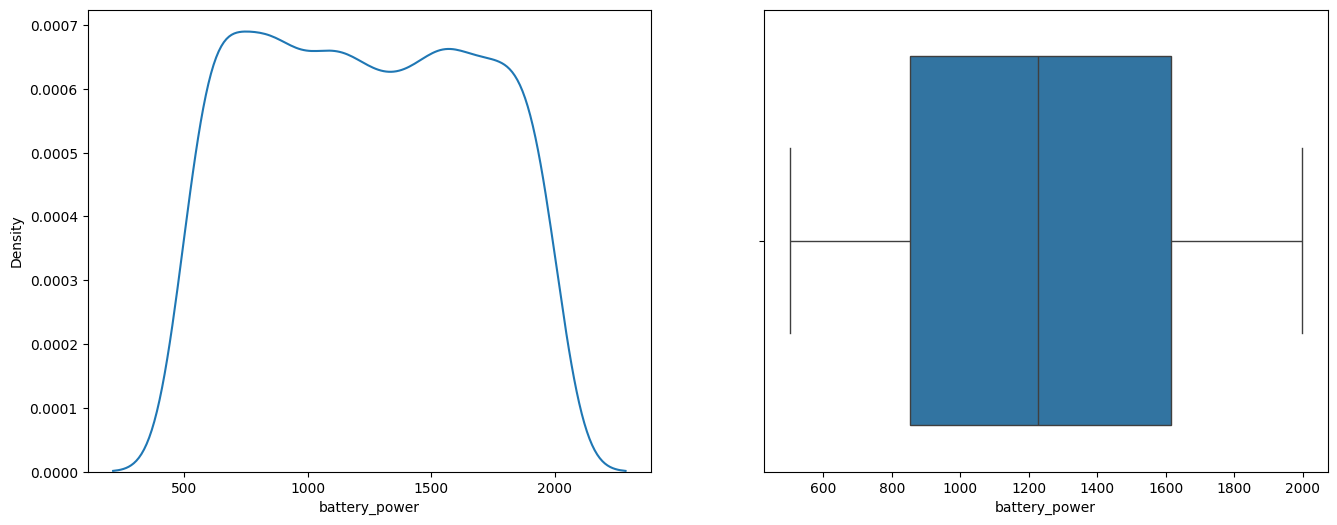

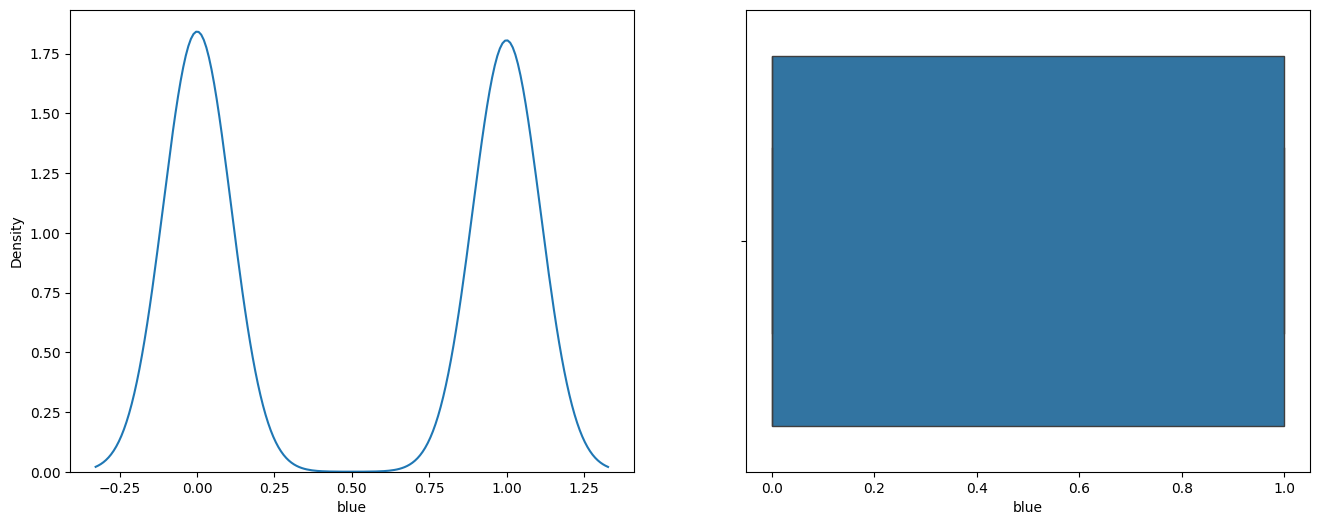

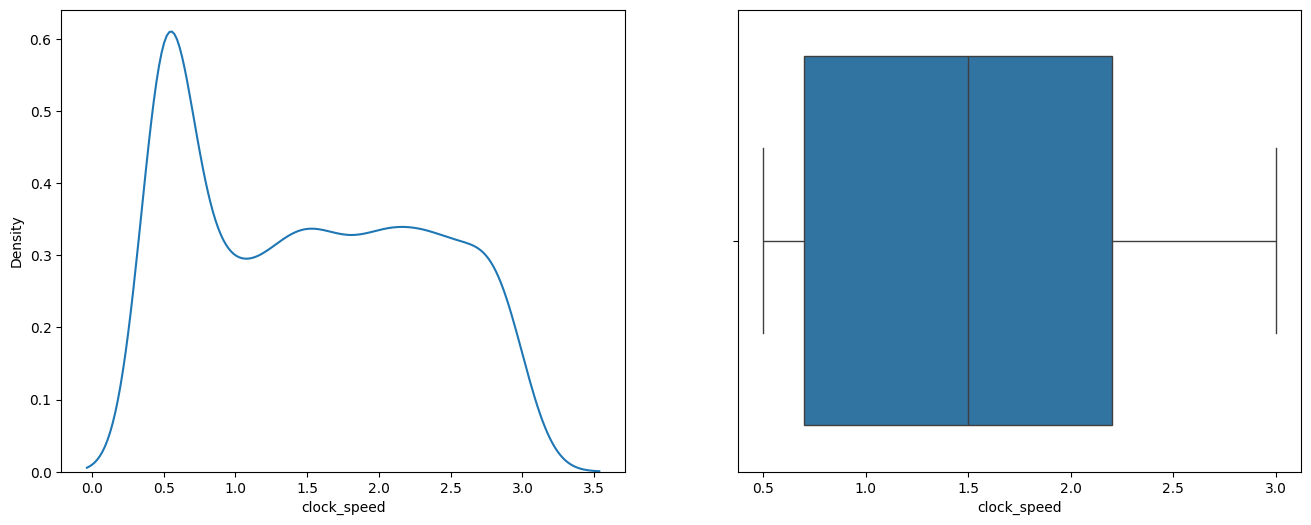

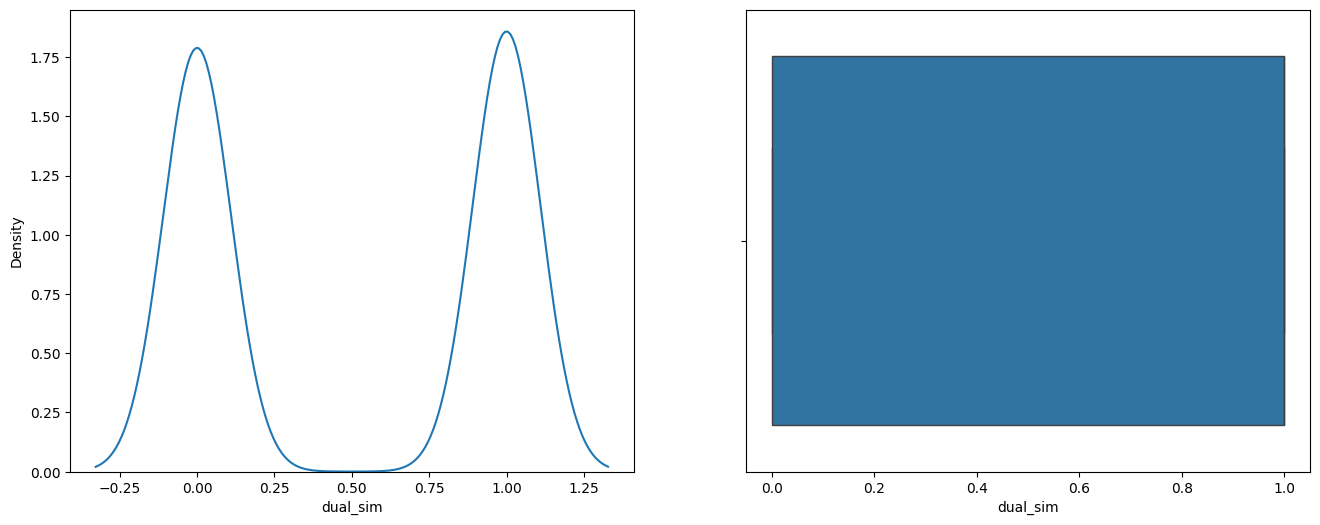

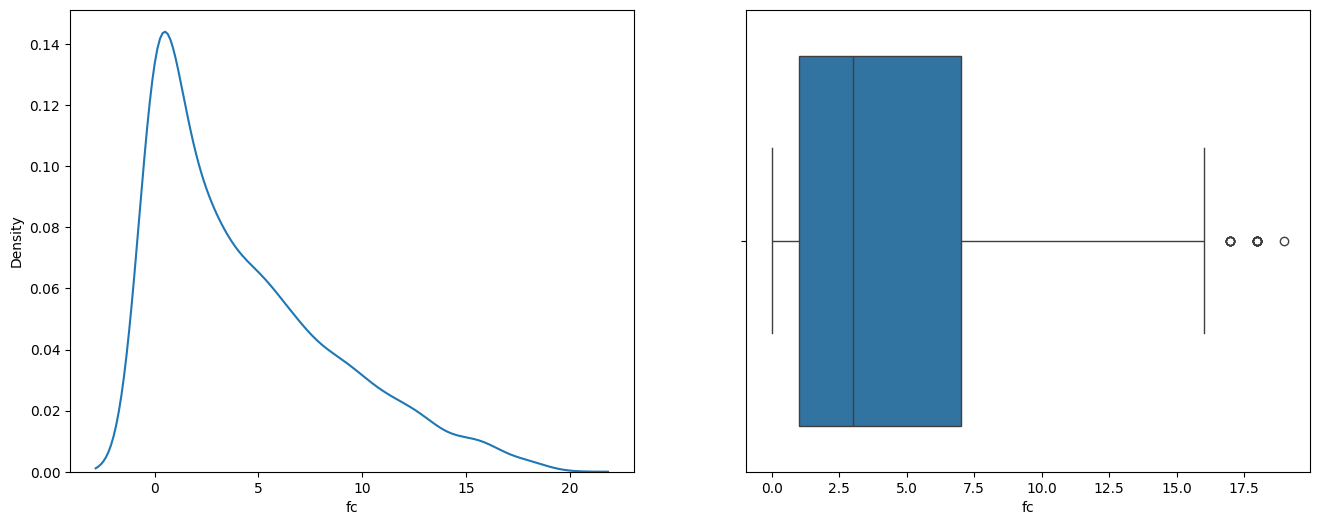

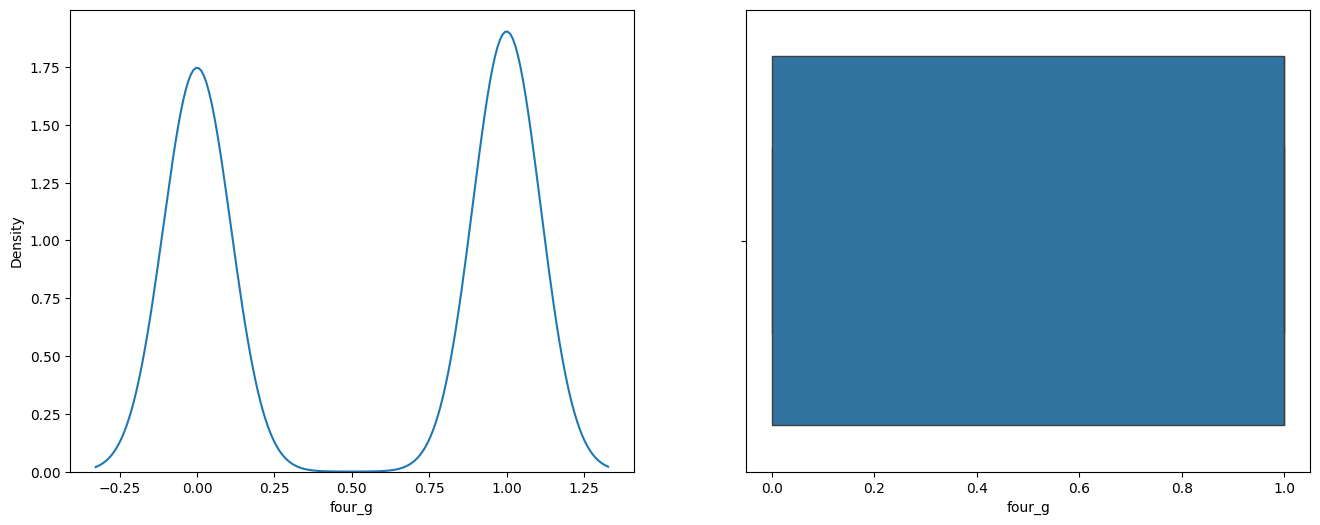

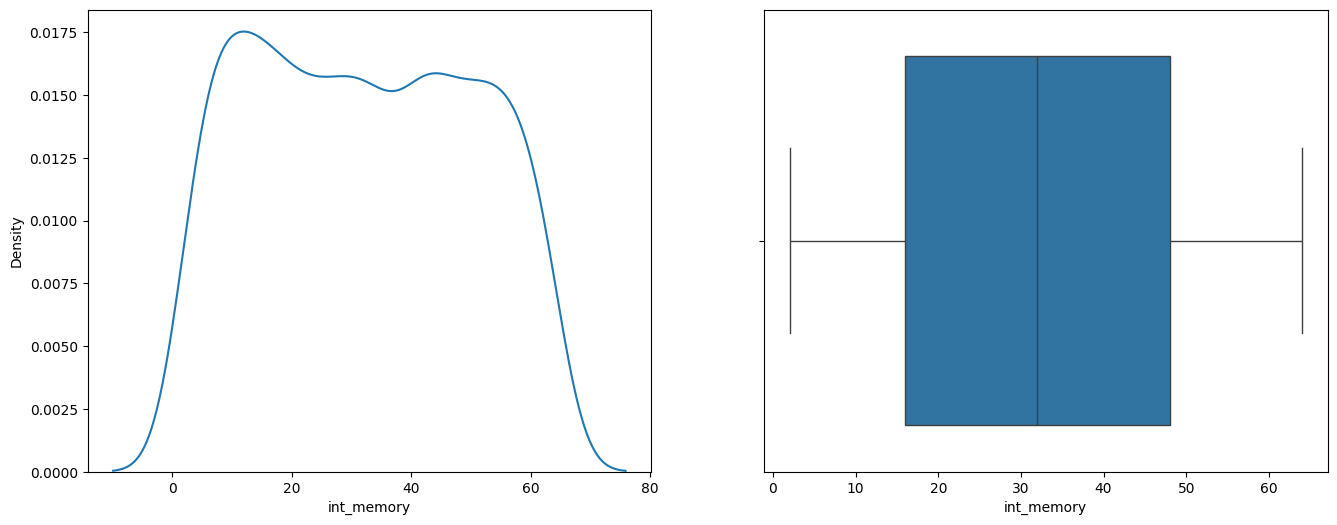

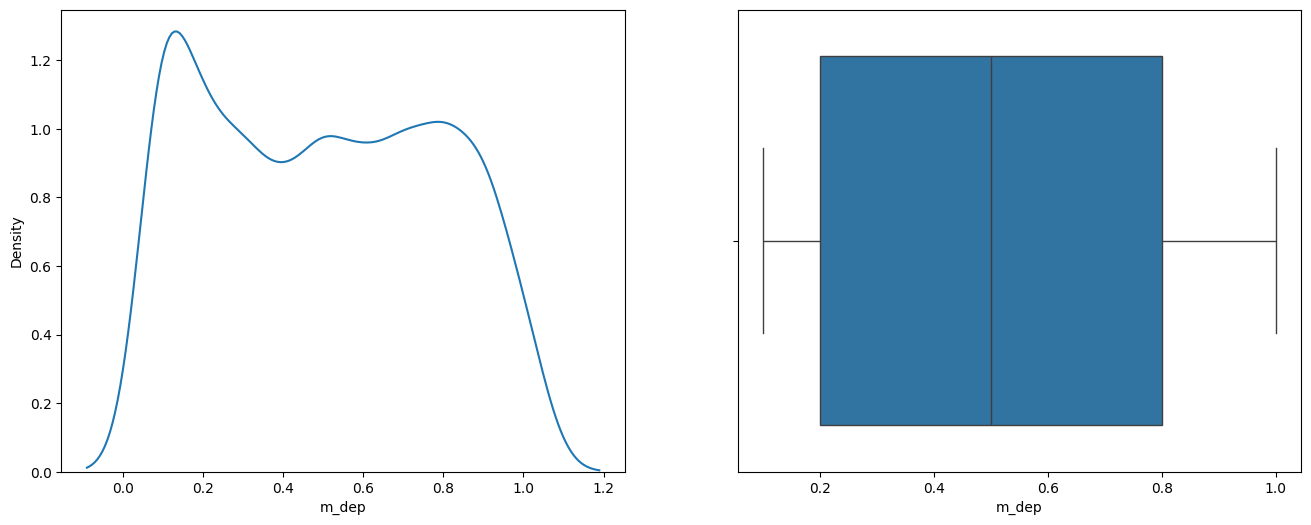

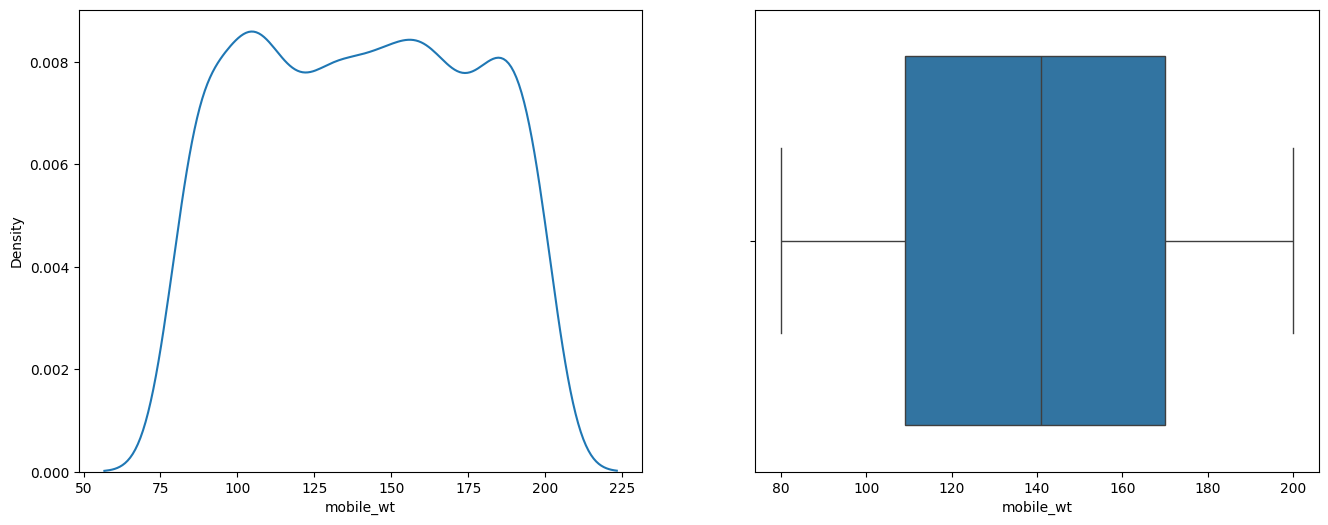

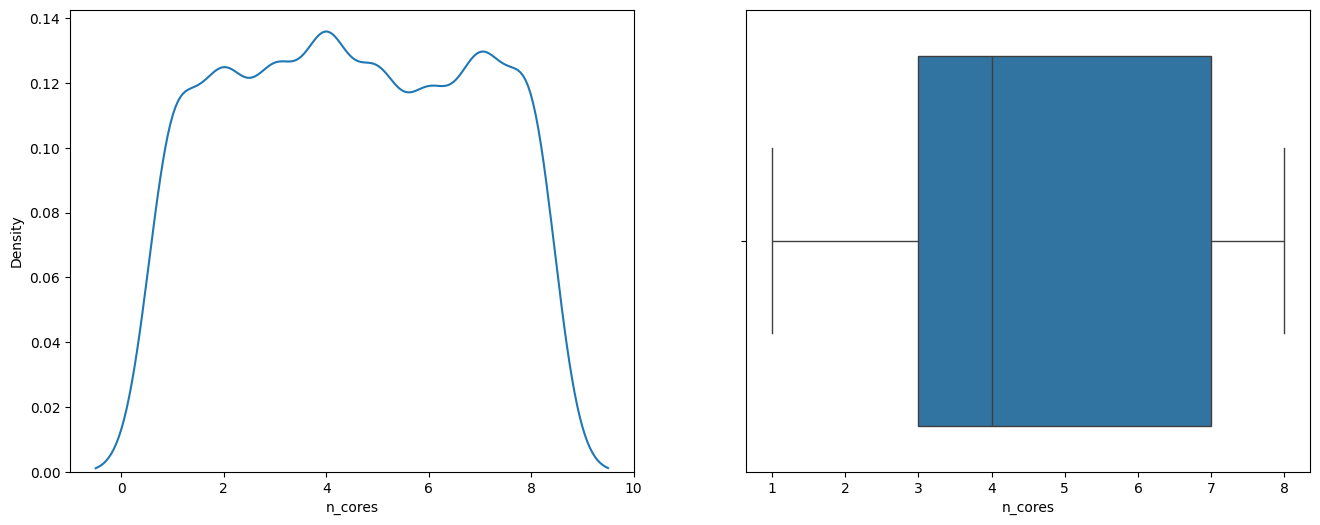

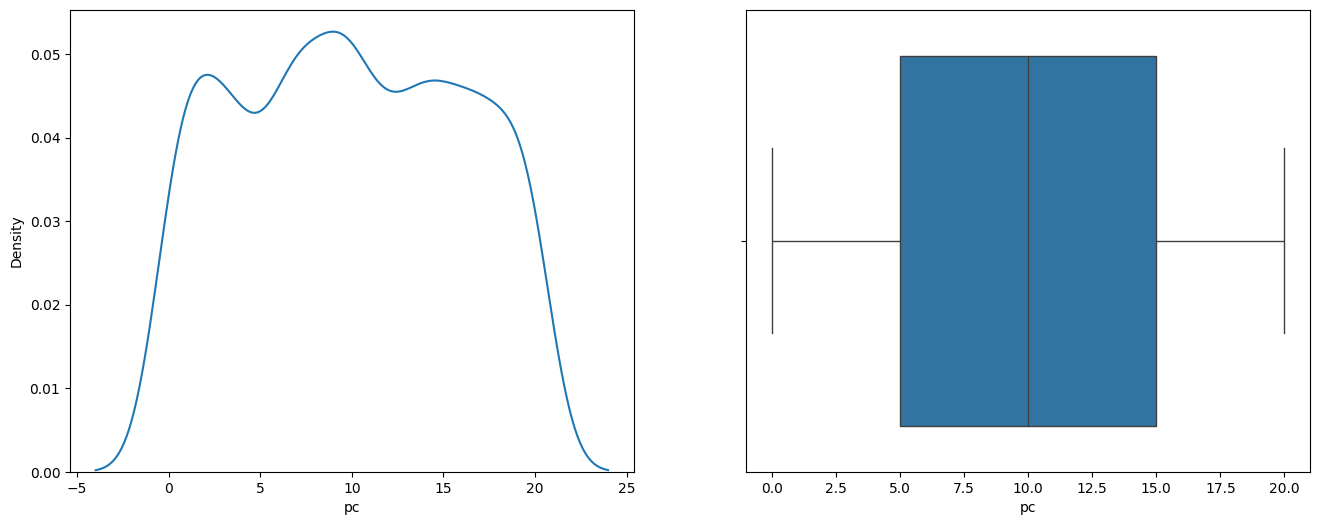

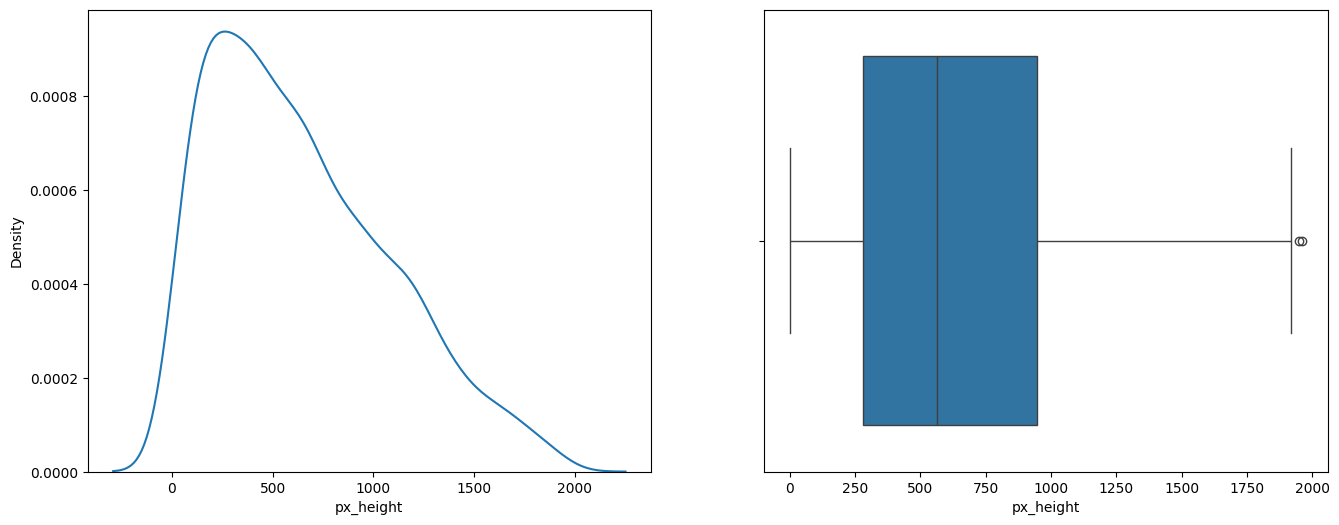

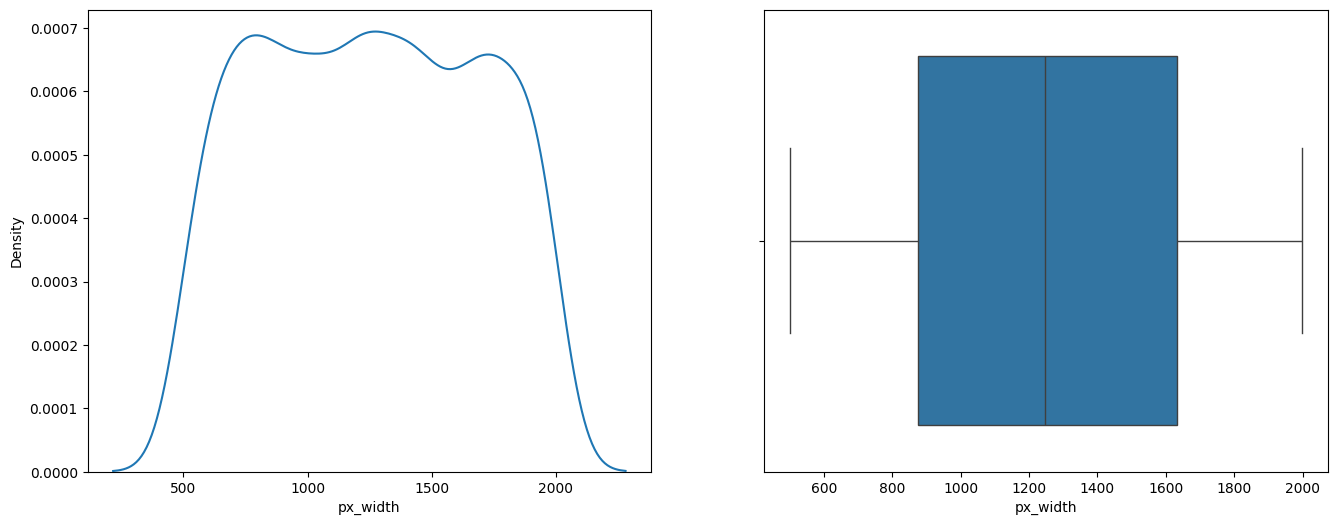

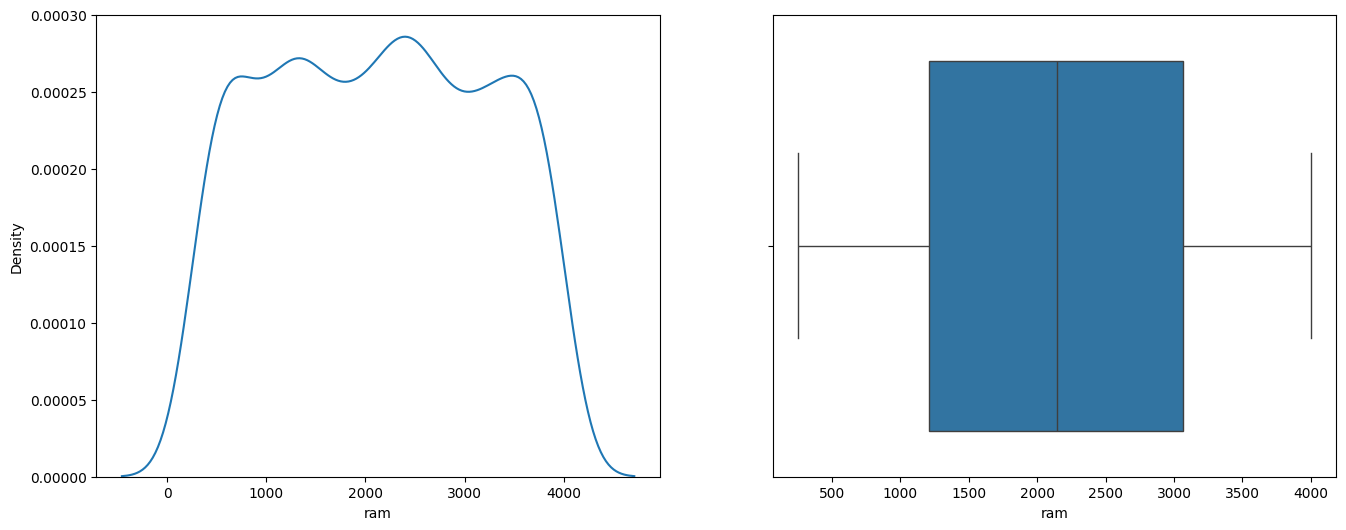

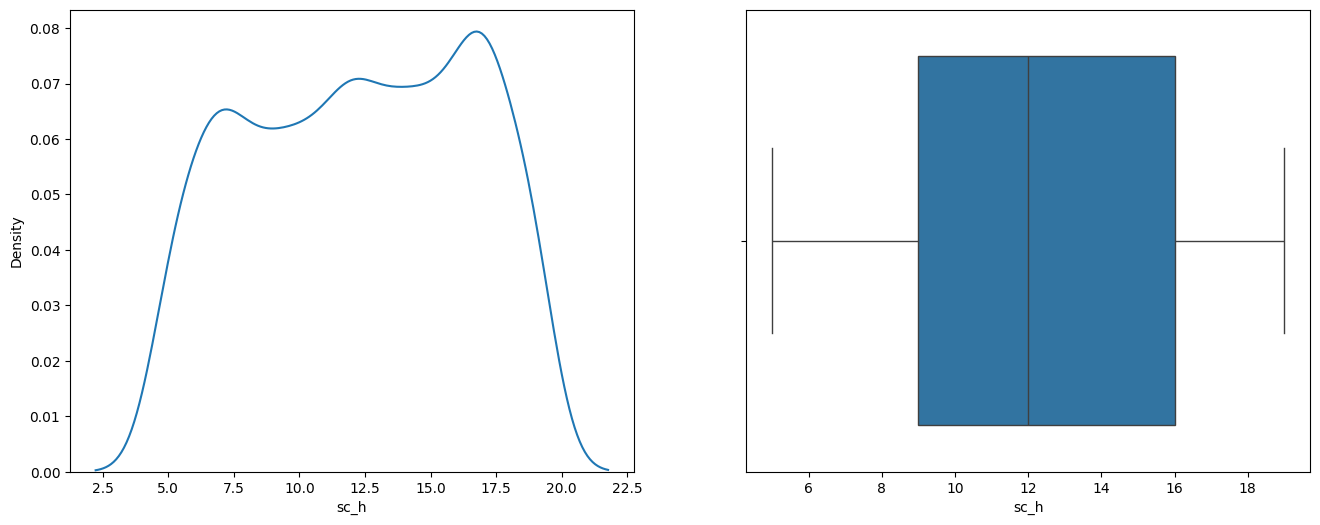

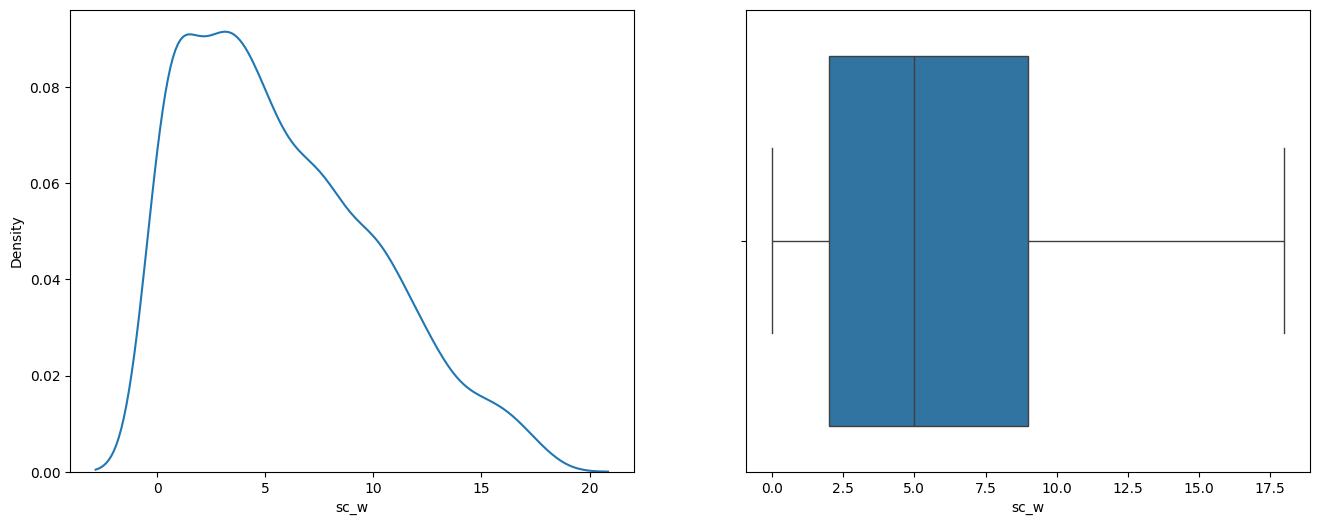

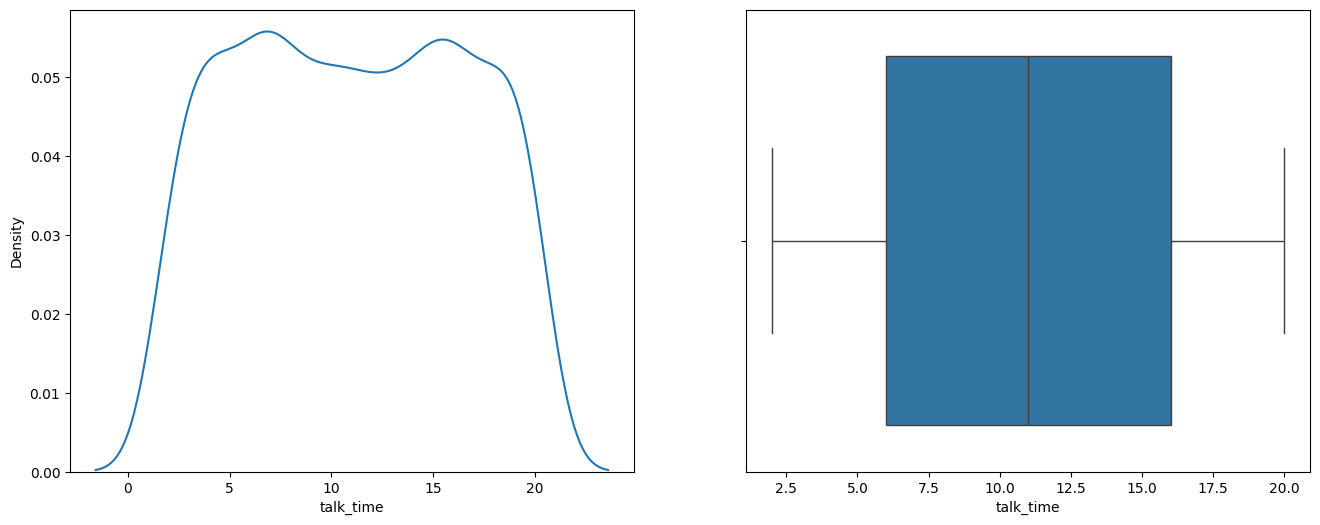

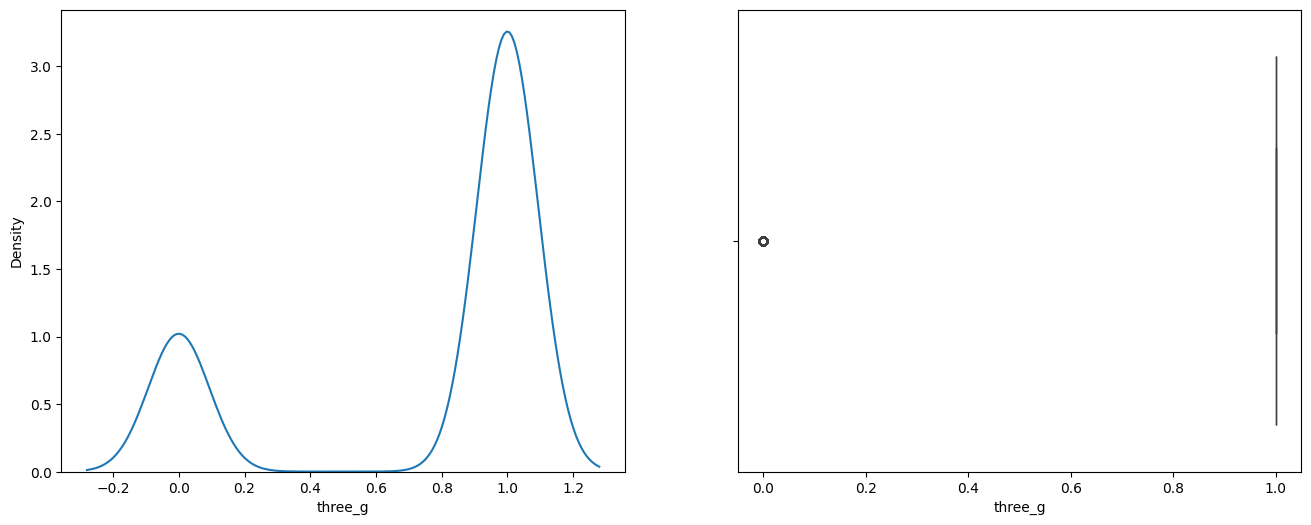

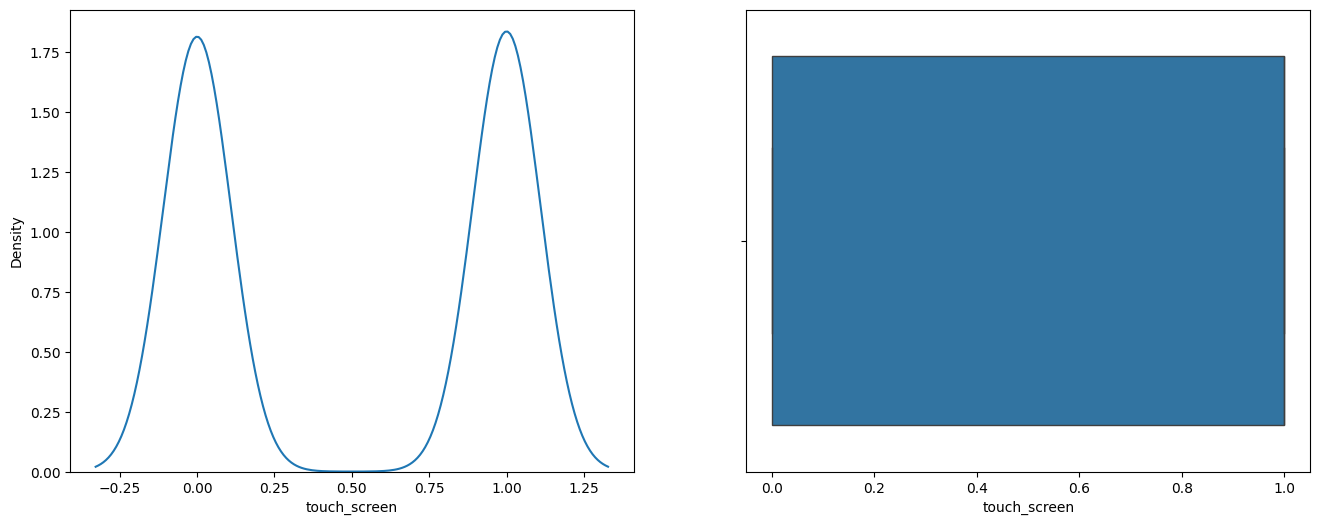

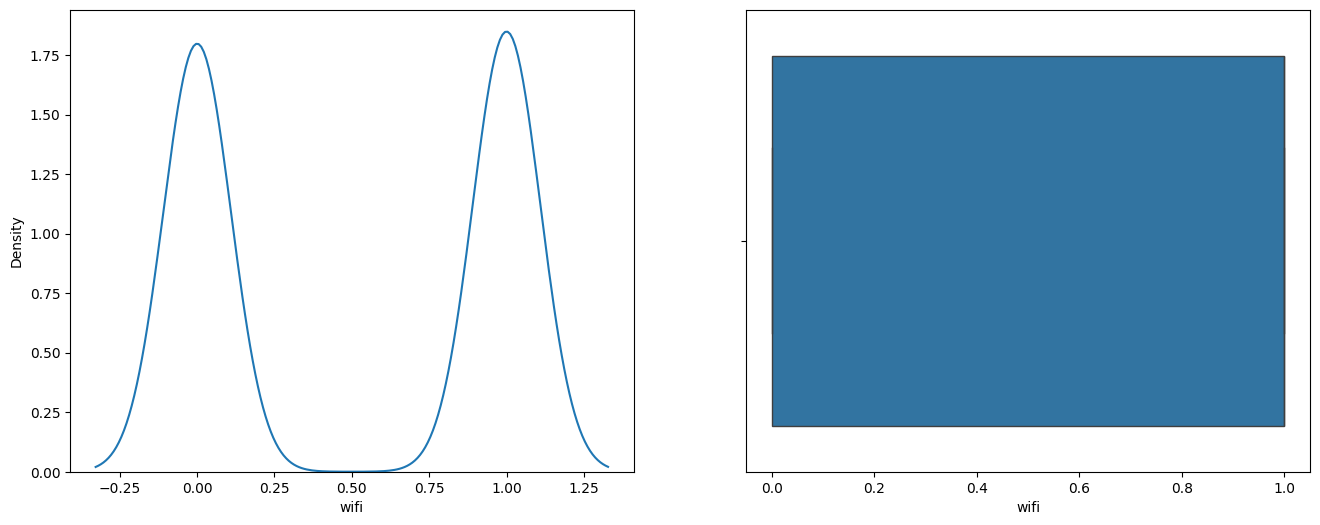

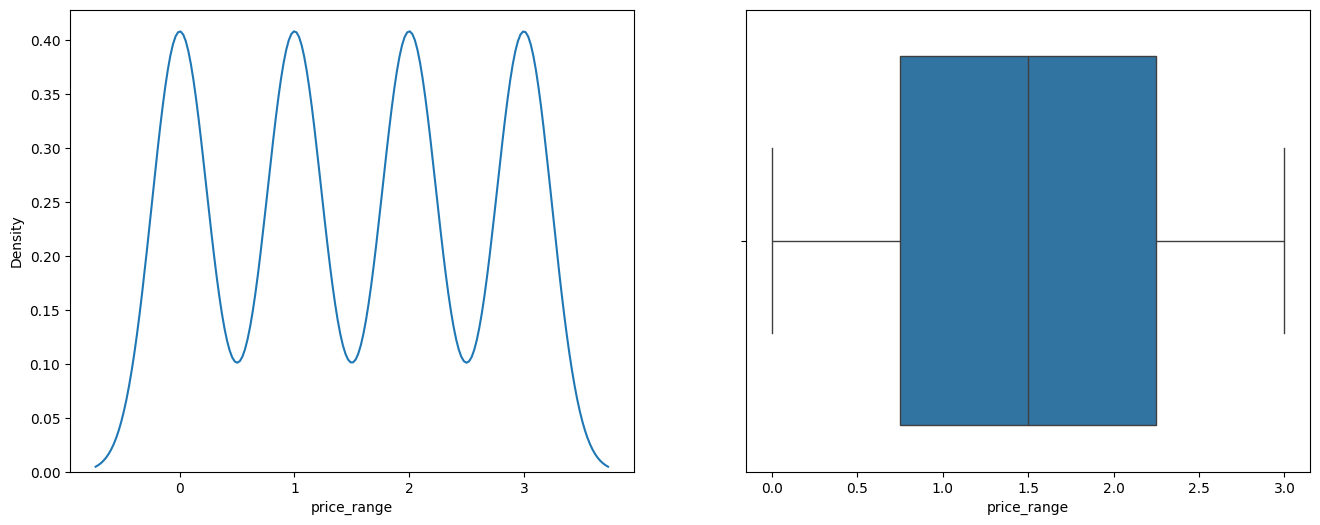

In [11]:
for col in df.columns:
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    sns.kdeplot(df[col])
    
    plt.subplot(122)
    sns.boxplot(x=df[col])
    plt.show()

In [12]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
x1=df.drop("price_range",axis=1)
y1=df["price_range"]

<Axes: >

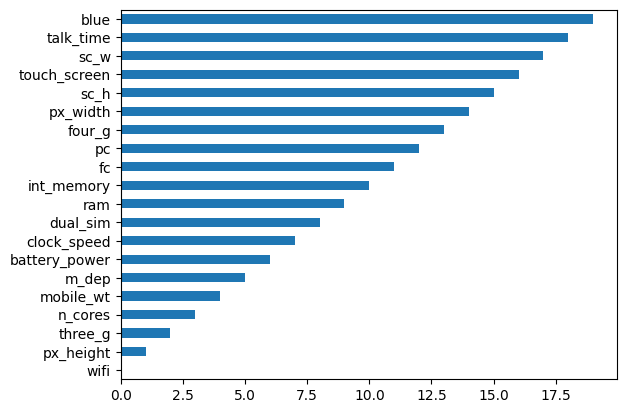

In [14]:

from skfeature.function.similarity_based import fisher_score

fishers_rank = fisher_score.fisher_score(x1.to_numpy(),y1.values)
s1 = pd.Series(fishers_rank, index = x1.columns)
s1.sort_values().plot(kind= 'barh')

<Axes: >

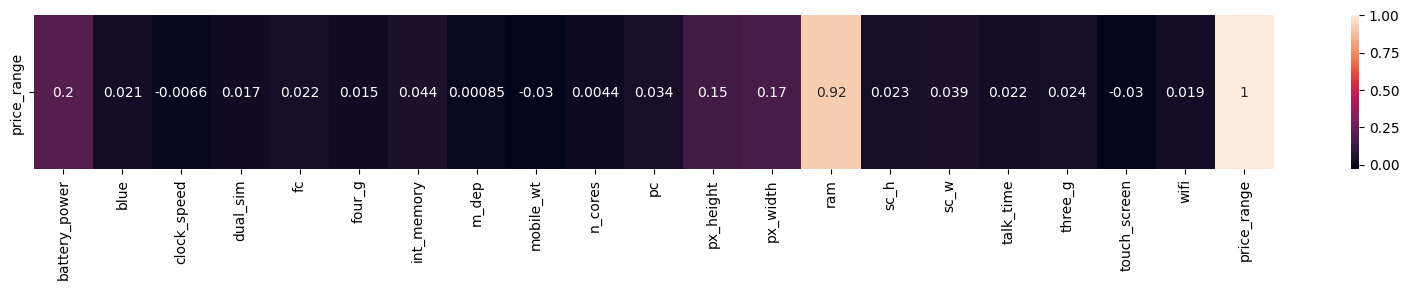

In [15]:
plt.figure(figsize = (20,2))
corr = df.corr().tail(1)
sns.heatmap(corr,annot = True)

#### Remove Outliers

In [16]:
q1 = df['fc'].quantile(0.25)
q3 = df['fc'].quantile(0.75)

IQR = q3 - q1

lower_tail = q1 - (1.5 * IQR)
upper_tail = q3 + (1.5 * IQR)


outliers_index_below_upper_tail = np.where(df['fc'] > upper_tail)


print(outliers_index_below_upper_tail)

(array([  95,  169,  226,  229,  300,  305,  372,  584, 1387, 1406, 1416,
       1549, 1554, 1693, 1705, 1880, 1882, 1888], dtype=int64),)


In [17]:
df['fc'].iloc[outliers_index_below_upper_tail] = df['fc'].mean()


In [18]:
df['fc'].iloc[outliers_index_below_upper_tail]

95      4.3095
169     4.3095
226     4.3095
229     4.3095
300     4.3095
305     4.3095
372     4.3095
584     4.3095
1387    4.3095
1406    4.3095
1416    4.3095
1549    4.3095
1554    4.3095
1693    4.3095
1705    4.3095
1880    4.3095
1882    4.3095
1888    4.3095
Name: fc, dtype: float64

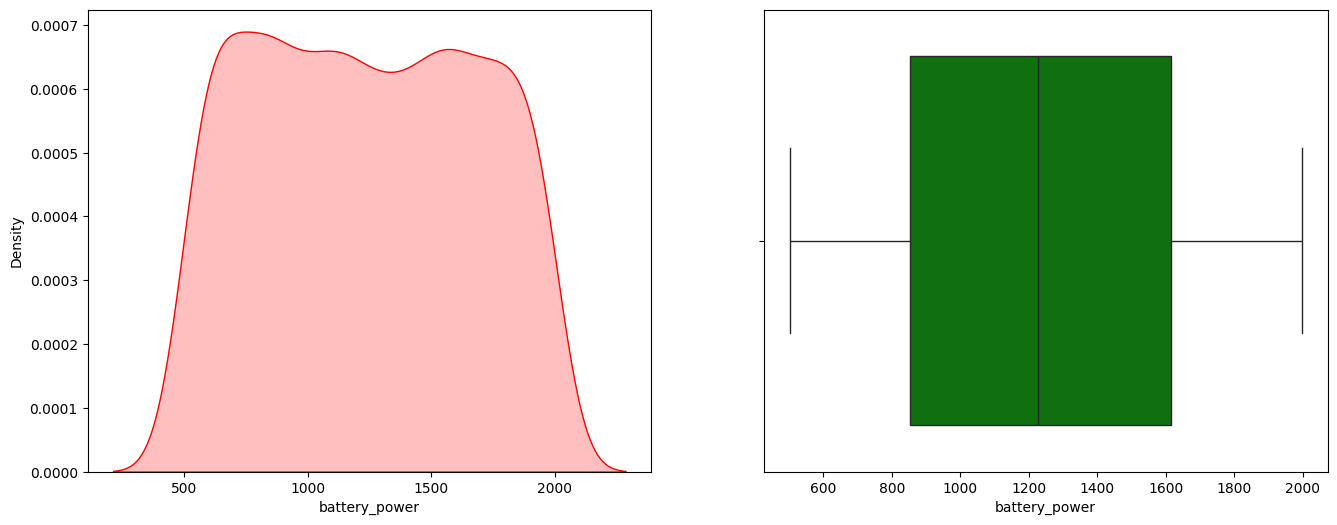

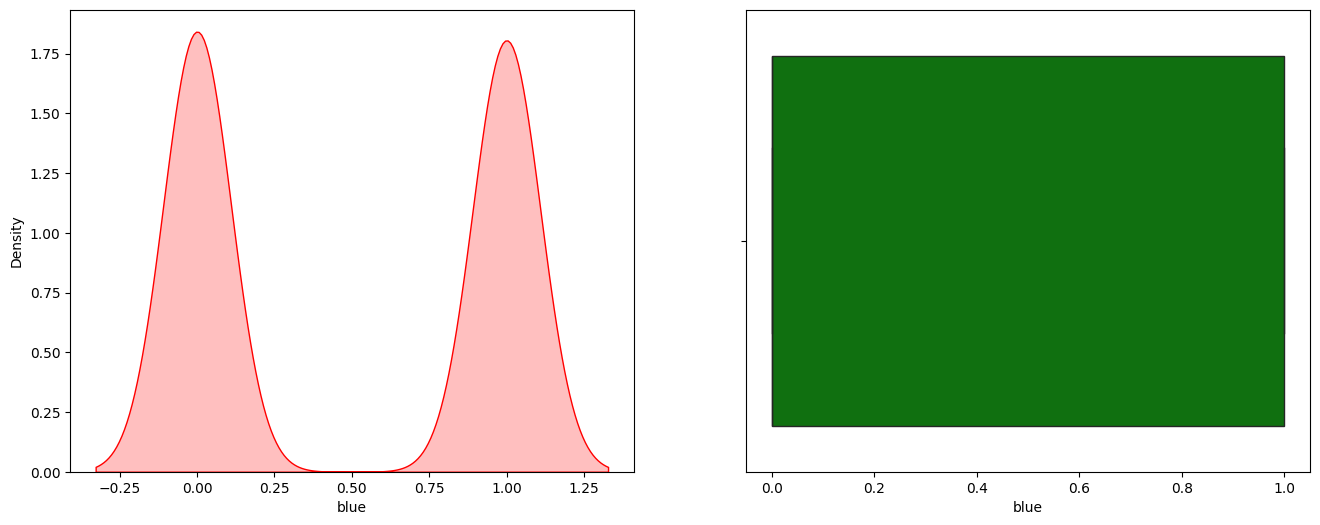

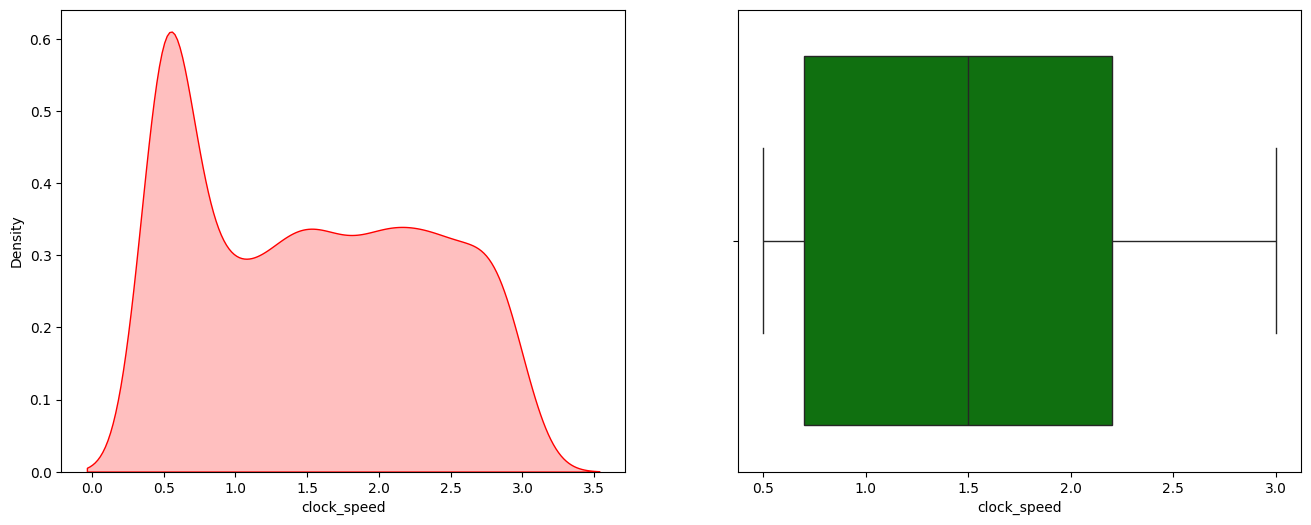

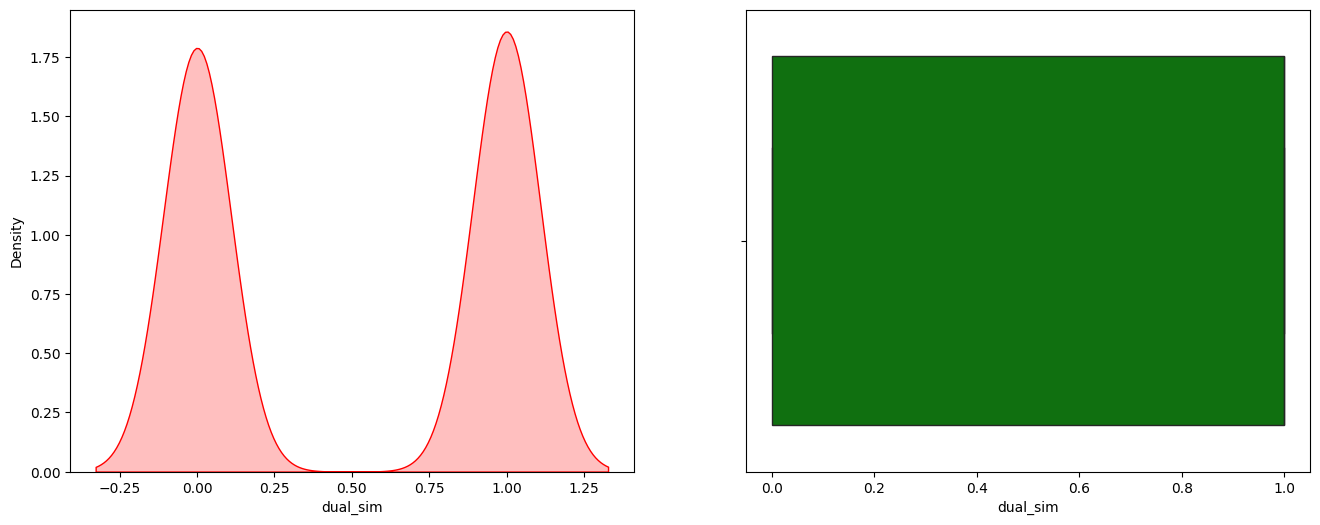

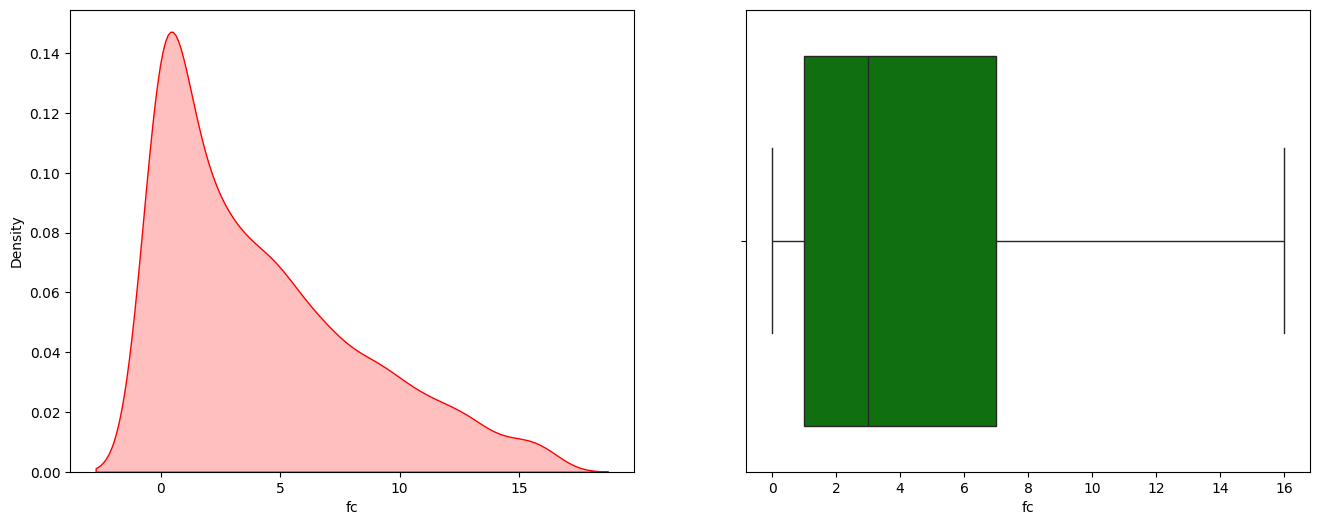

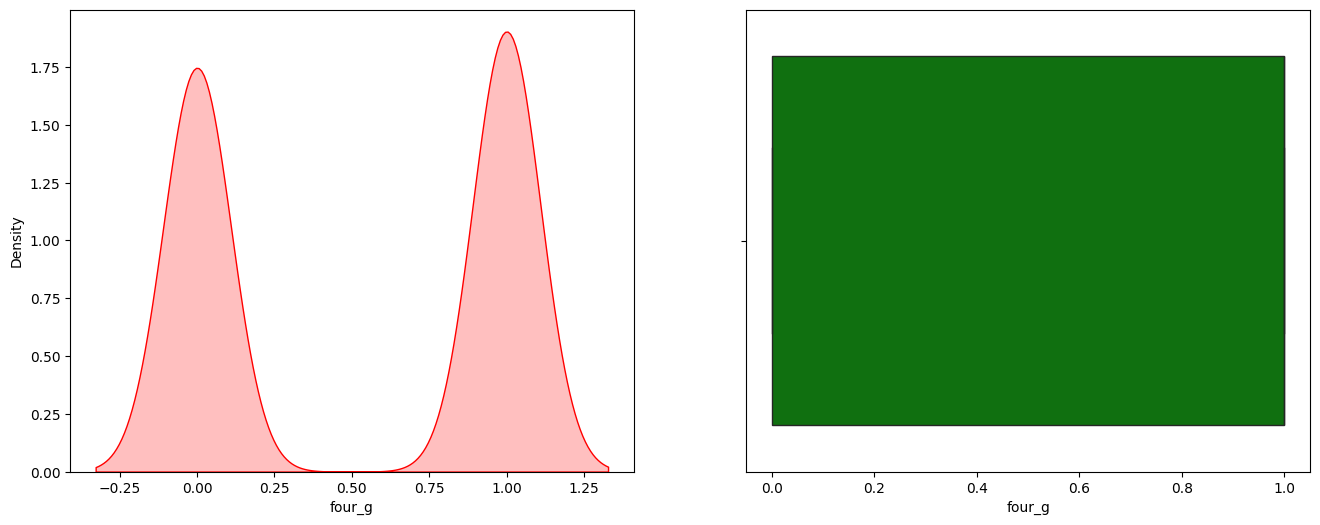

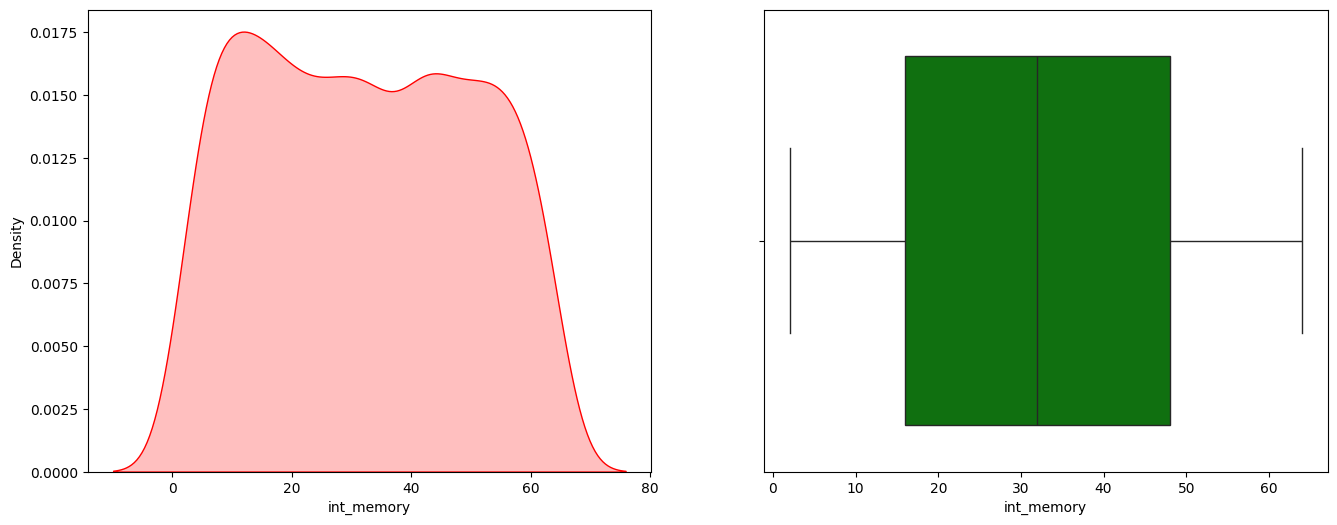

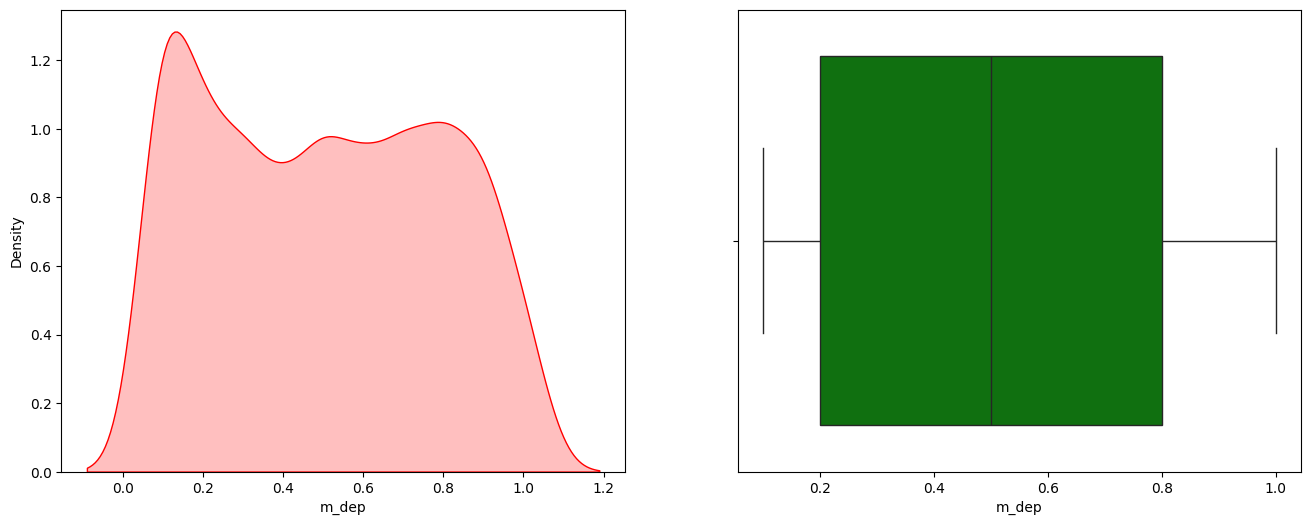

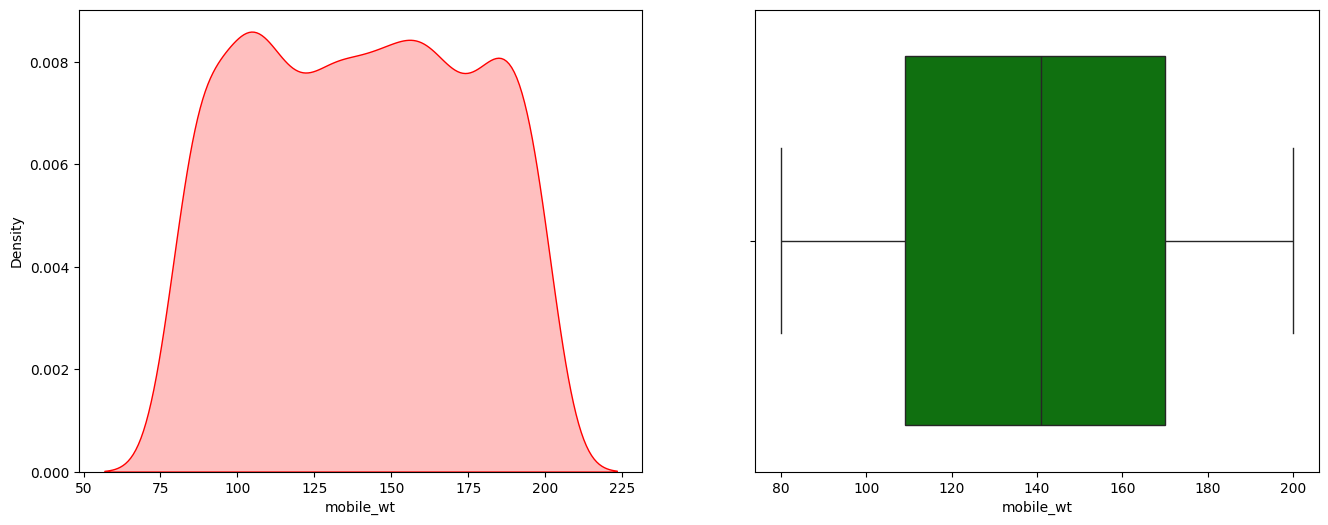

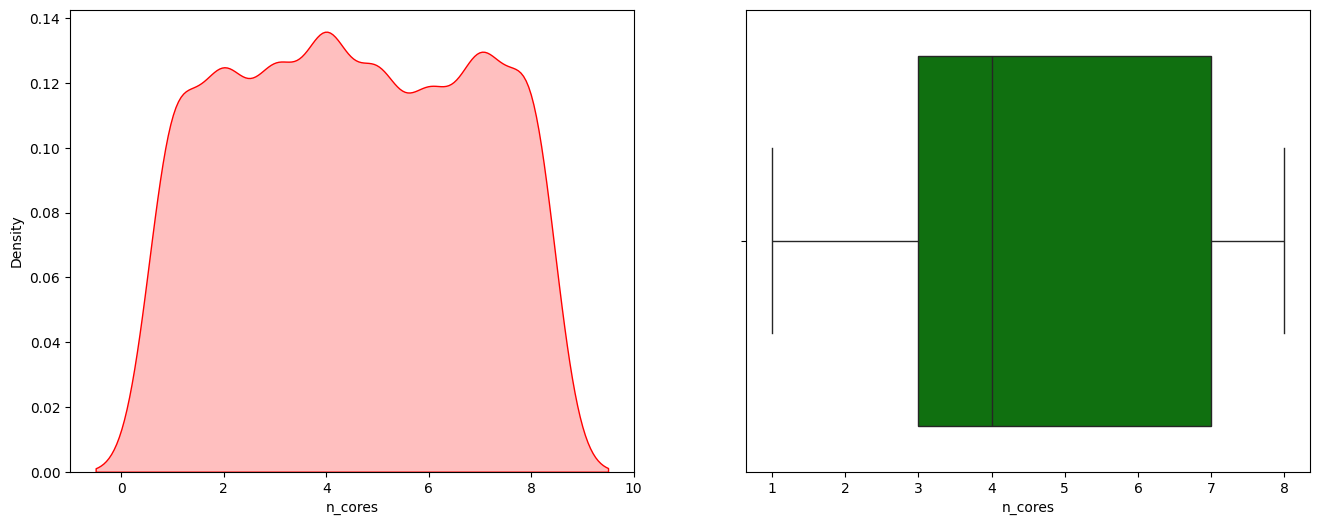

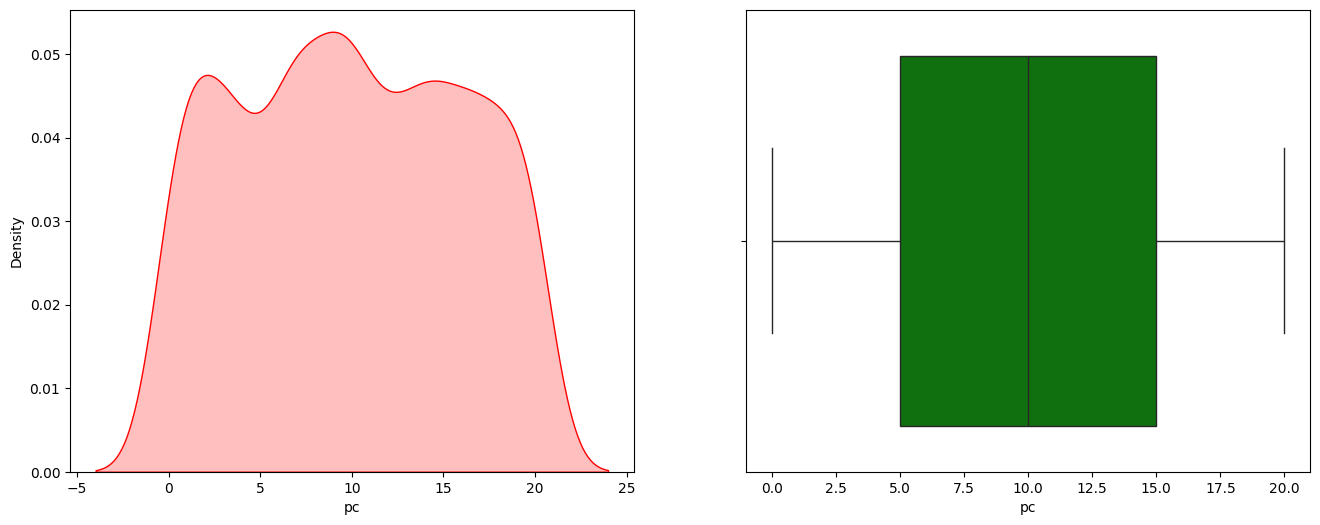

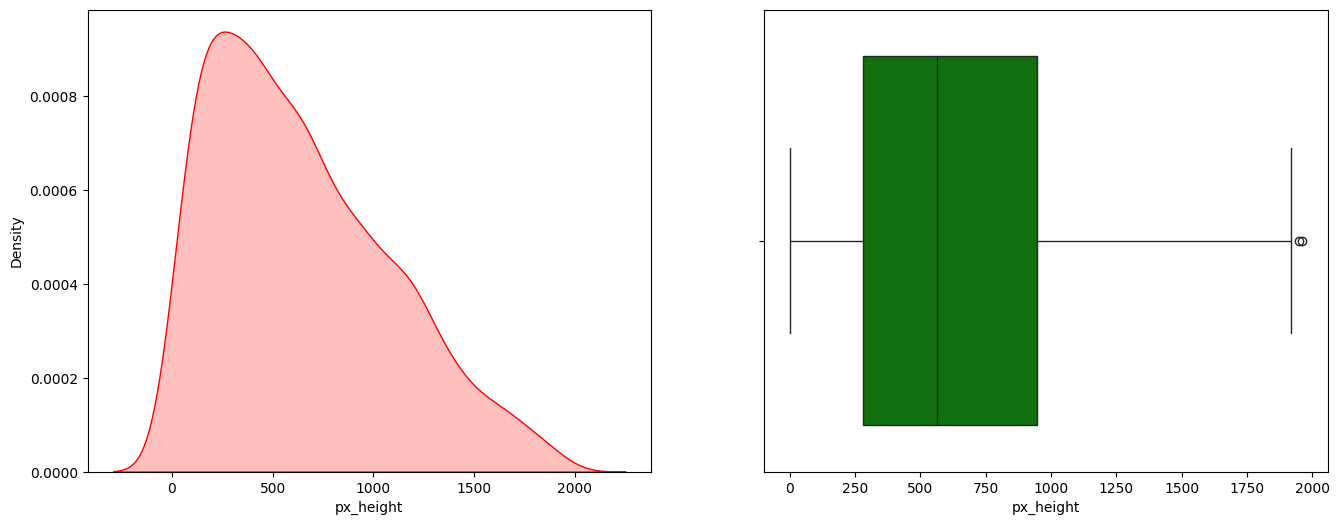

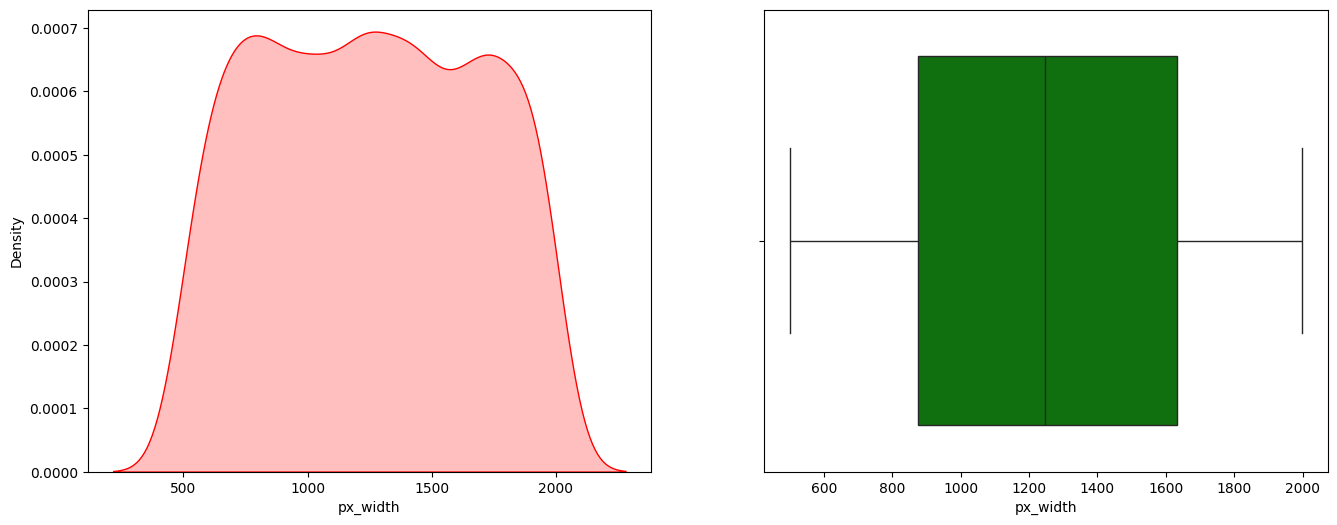

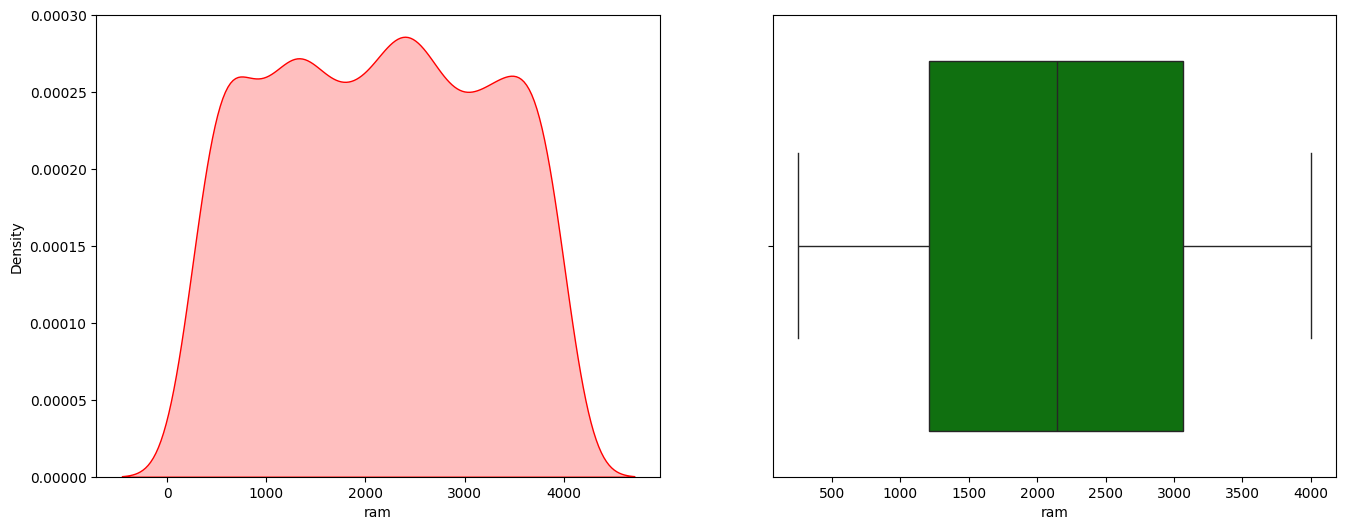

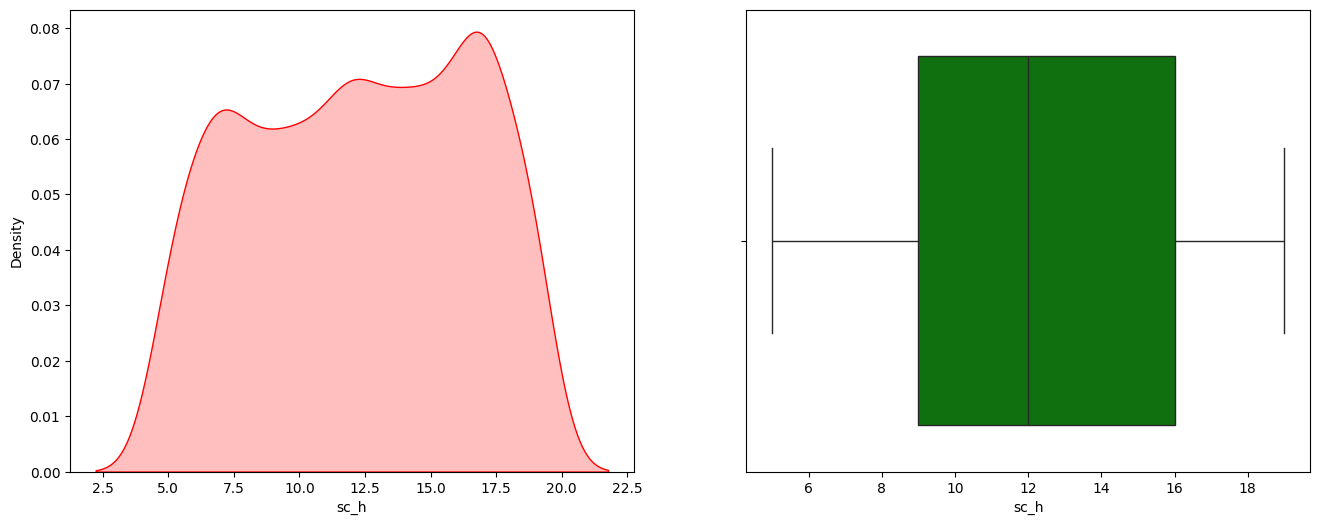

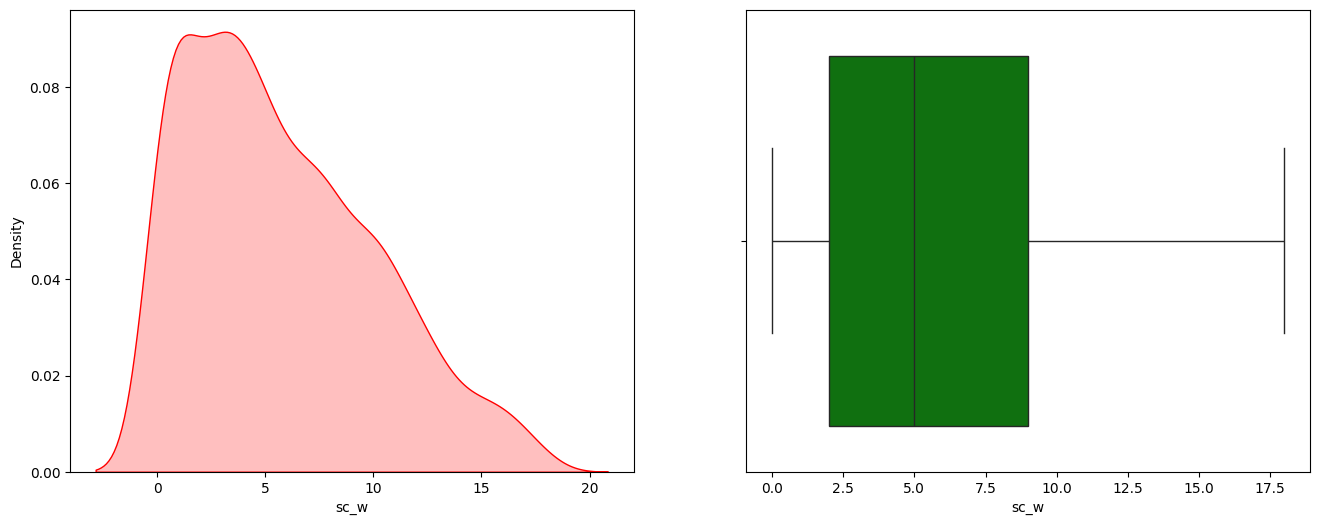

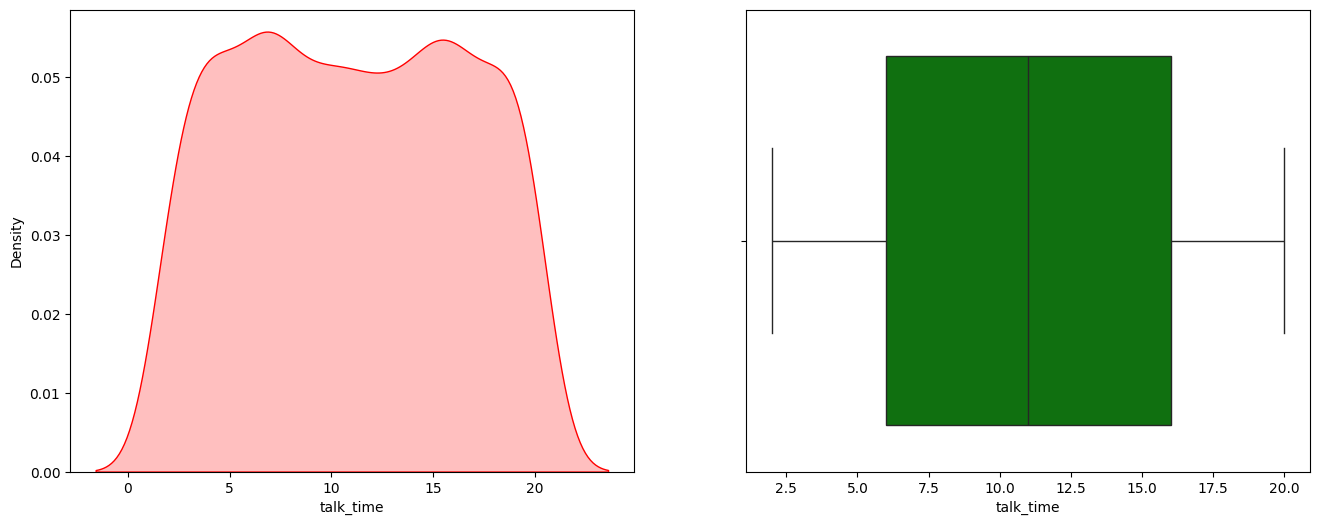

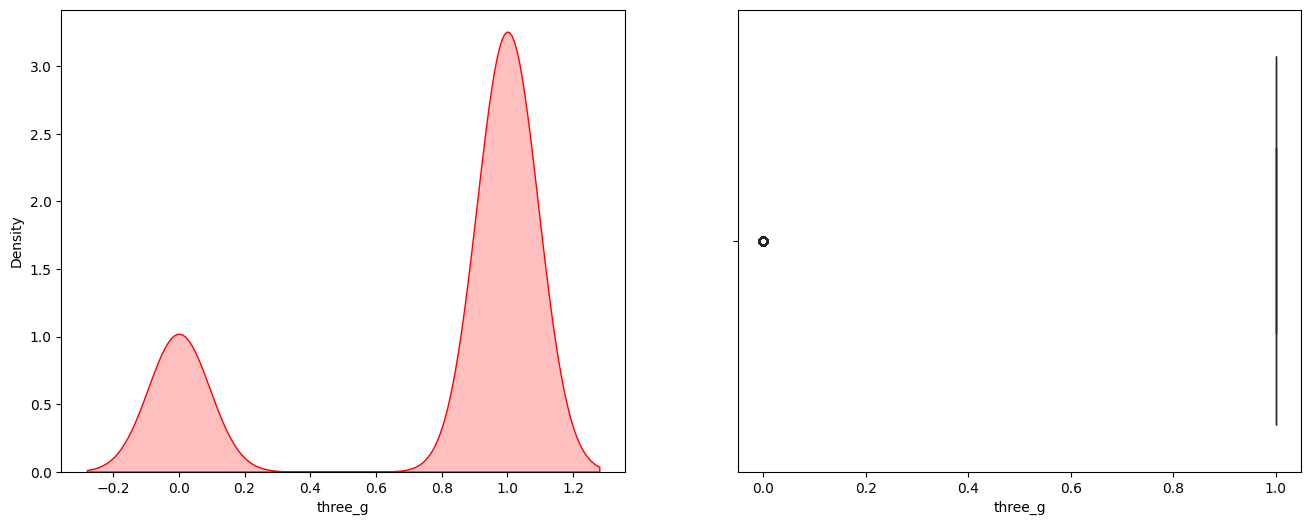

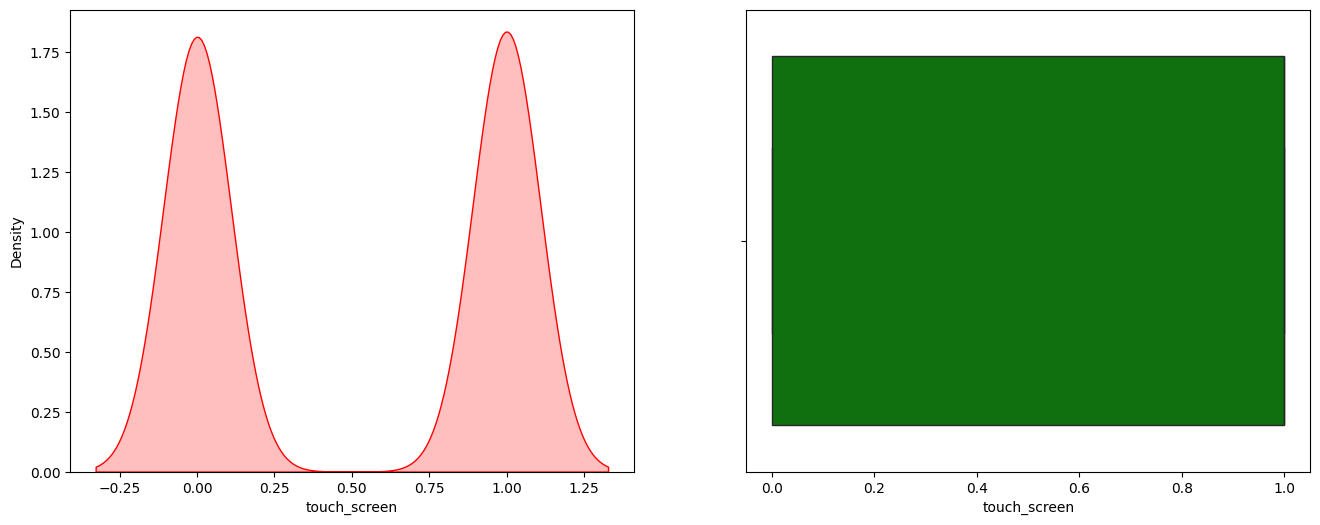

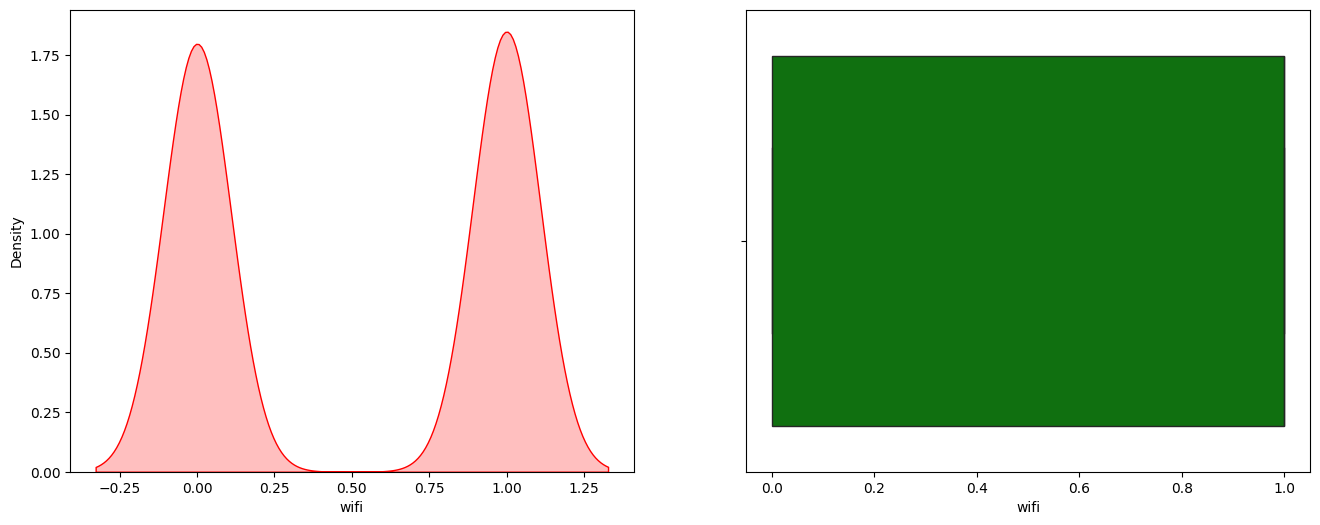

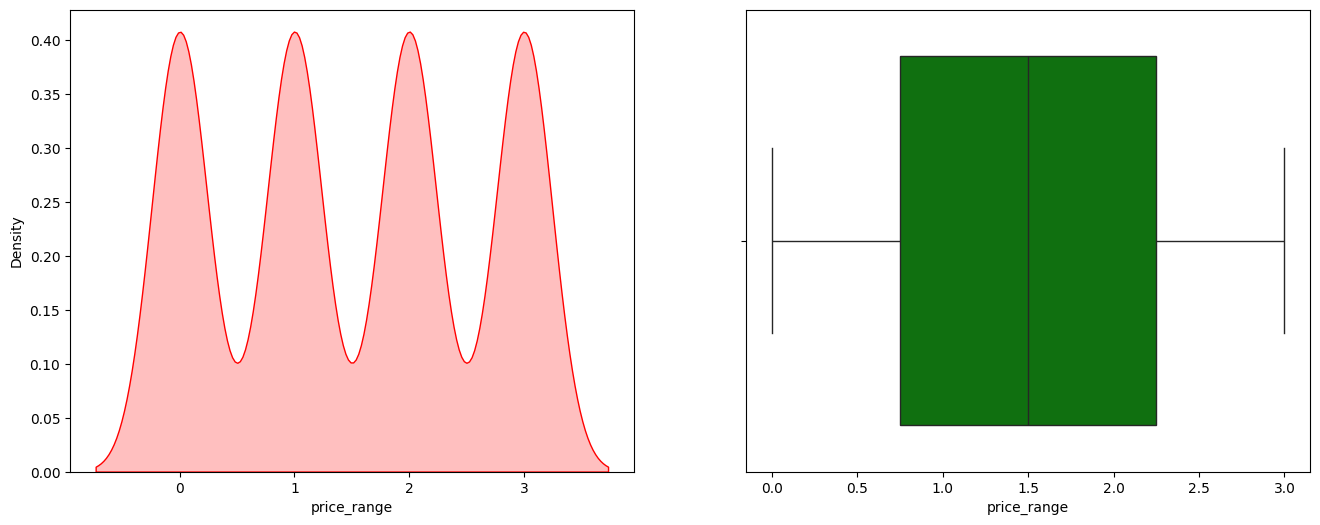

In [19]:
for col in df.columns:
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    sns.kdeplot(df[col],fill=True,color="r")
    
    plt.subplot(122)
    sns.boxplot(x=df[col],color='g')
    plt.show()

In [20]:
df

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0               842     0          2.2         0   1.0       0           7   
1              1021     1          0.5         1   0.0       1          53   
2               563     1          0.5         1   2.0       1          41   
3               615     1          2.5         0   0.0       0          10   
4              1821     1          1.2         0  13.0       1          44   
...             ...   ...          ...       ...   ...     ...         ...   
1995            794     1          0.5         1   0.0       1           2   
1996           1965     1          2.6         1   0.0       0          39   
1997           1911     0          0.9         1   1.0       1          36   
1998           1512     0          0.9         0   4.0       1          46   
1999            510     1          2.0         1   5.0       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [21]:
x = df.drop('price_range',axis = 1)
y = df['price_range']

#### Model Training

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size= 0.2,random_state=2)

In [23]:
x_train.shape ,# x_test.shape , y_train.shape , y_test.shape

((400, 20),)

### Logistic Regression

In [24]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [25]:
#Training model evoluton

y_pred_train = log_reg.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

print('*'*50)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy :',accuracy)
print('*'*50)                          

clf_report = classification_report(y_train,y_pred_train)                          
print('Classification Report :\n',clf_report)                          

Confusion Matrix :
 [[78 16  2  0]
 [16 53 29  6]
 [ 0 28 52 28]
 [ 0  0 19 73]]
**************************************************
Accuracy : 0.64
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        96
           1       0.55      0.51      0.53       104
           2       0.51      0.48      0.50       108
           3       0.68      0.79      0.73        92

    accuracy                           0.64       400
   macro avg       0.64      0.65      0.64       400
weighted avg       0.64      0.64      0.64       400



In [26]:
#Testing model evoluton

y_pred_test = log_reg.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix :\n',cnf_matrix)

print('*'*50)
accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy :',accuracy)
print('*'*50)                          

clf_report = classification_report(y_test,y_pred_test)                          
print('Classification Report :\n',clf_report)                          

Confusion Matrix :
 [[316  82   6   0]
 [ 65 198 112  21]
 [  1  71 191 129]
 [  0   1  96 311]]
**************************************************
Accuracy : 0.635
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       404
           1       0.56      0.50      0.53       396
           2       0.47      0.49      0.48       392
           3       0.67      0.76      0.72       408

    accuracy                           0.64      1600
   macro avg       0.63      0.63      0.63      1600
weighted avg       0.64      0.64      0.63      1600



### knn classification

In [27]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
#Training model evoluton

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

print('*'*50)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy :',accuracy)
print('*'*50)                          

clf_report = classification_report(y_train,y_pred_train)                          
print('Classification Report :\n',clf_report)                          

Confusion Matrix :
 [[ 95   1   0   0]
 [  3  97   4   0]
 [  0   2 103   3]
 [  0   0   3  89]]
**************************************************
Accuracy : 0.96
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        96
           1       0.97      0.93      0.95       104
           2       0.94      0.95      0.94       108
           3       0.97      0.97      0.97        92

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [29]:
#Testing model evoluton

y_pred_test = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix :\n',cnf_matrix)

print('*'*50)
accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy :',accuracy)
print('*'*50)                          

clf_report = classification_report(y_test,y_pred_test)                          
print('Classification Report :\n',clf_report)                          

Confusion Matrix :
 [[386  18   0   0]
 [ 24 323  49   0]
 [  0  14 339  39]
 [  0   0  29 379]]
**************************************************
Accuracy : 0.891875
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       404
           1       0.91      0.82      0.86       396
           2       0.81      0.86      0.84       392
           3       0.91      0.93      0.92       408

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



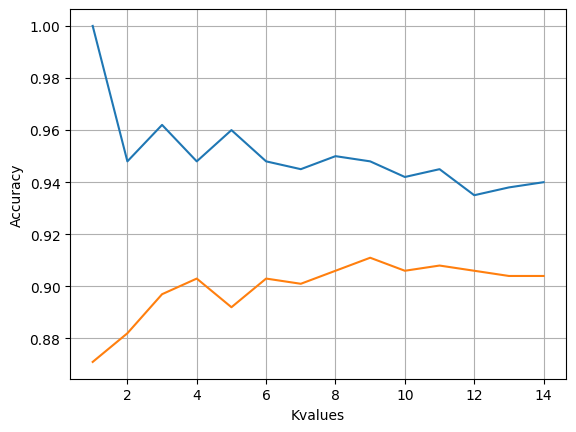

In [32]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []

for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors= k, p = 2)
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train), 3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test), 3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

plt.grid()
plt.show()

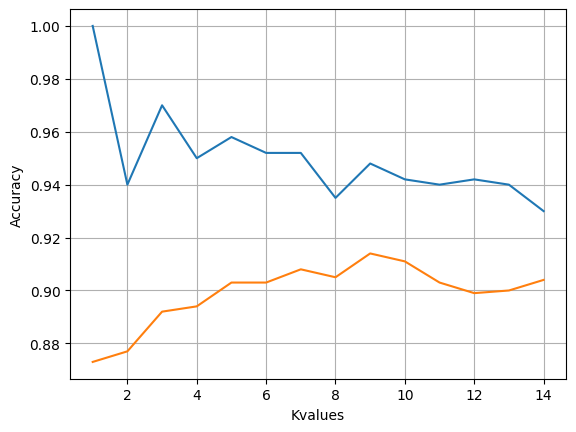

In [34]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []

for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors= k, p = 1)
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train), 3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test), 3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

plt.grid()
plt.show()

In [38]:
knn_clf = KNeighborsClassifier(n_neighbors=8,p=1)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8, p=1)

In [39]:
#Training model evoluton

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

print('*'*50)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy :',accuracy)
print('*'*50)                          

clf_report = classification_report(y_train,y_pred_train)                          
print('Classification Report :\n',clf_report)                          

Confusion Matrix :
 [[95  1  0  0]
 [ 6 96  2  0]
 [ 0 11 96  1]
 [ 0  0  5 87]]
**************************************************
Accuracy : 0.935
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        96
           1       0.89      0.92      0.91       104
           2       0.93      0.89      0.91       108
           3       0.99      0.95      0.97        92

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.93       400



In [40]:
#Testing model evoluton

y_pred_test = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix :\n',cnf_matrix)

print('*'*50)
accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy :',accuracy)
print('*'*50)                          

clf_report = classification_report(y_test,y_pred_test)                          
print('Classification Report :\n',clf_report)                          

Confusion Matrix :
 [[392  12   0   0]
 [ 40 327  29   0]
 [  0  21 350  21]
 [  0   0  29 379]]
**************************************************
Accuracy : 0.905
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       404
           1       0.91      0.83      0.87       396
           2       0.86      0.89      0.87       392
           3       0.95      0.93      0.94       408

    accuracy                           0.91      1600
   macro avg       0.91      0.90      0.90      1600
weighted avg       0.91      0.91      0.90      1600



### Decision Tree

In [62]:
dt_clf = DecisionTreeClassifier(criterion='gini',random_state=1)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [65]:
#Training model evoluton

y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

print('*'*50)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy :',accuracy)
print('*'*50)                          

clf_report = classification_report(y_train,y_pred_train)                          
print('Classification Report :\n',clf_report)                          

Confusion Matrix :
 [[ 96   0   0   0]
 [  0 104   0   0]
 [  0   0 108   0]
 [  0   0   0  92]]
**************************************************
Accuracy : 1.0
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       108
           3       1.00      1.00      1.00        92

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [66]:
#Testing model evoluton

y_pred_test = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix :\n',cnf_matrix)

print('*'*50)
accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy :',accuracy)
print('*'*50)                          

clf_report = classification_report(y_test,y_pred_test)                          
print('Classification Report :\n',clf_report)                          

Confusion Matrix :
 [[362  40   2   0]
 [ 57 273  66   0]
 [  0  30 307  55]
 [  0   0  67 341]]
**************************************************
Accuracy : 0.801875
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       404
           1       0.80      0.69      0.74       396
           2       0.69      0.78      0.74       392
           3       0.86      0.84      0.85       408

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



#### Hyper parameter tuning

In [68]:
dt_clf = DecisionTreeClassifier(criterion='gini',random_state=1)

hyp_grid = {'criterion':['gini','entropy'],
            'max_depth':np.arange(5,10),
            'min_samples_split':range(10,15),
            'min_samples_leaf':range(3,8)}

gscv_dt_clf = GridSearchCV(dt_clf,param_grid = hyp_grid,cv =3 , n_jobs=-1)
gscv_dt_clf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': range(3, 8),
                         'min_samples_split': range(10, 15)})

In [69]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=10, random_state=1)

In [70]:
dt_clf = gscv_dt_clf.best_estimator_
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=10, random_state=1)

In [73]:
print('Train Accuracy :',dt_clf.score(x_train, y_train))
print("Test Accuracy :",dt_clf.score(x_test, y_test))
plt.figure(figsize = (100,90))
tree = plot_tree(dt_clf, feature_names=x.columns, filled=True)
plt.savefig('DT_clf_test.png')

Train Accuracy : 0.9475
Test Accuracy : 0.799375


### Random Forest

In [78]:
rf_clf = RandomForestClassifier(n_estimators=100,random_state=1)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [79]:
#Training model evoluton

y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

print('*'*50)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy :',accuracy)
print('*'*50)                          

clf_report = classification_report(y_train,y_pred_train)                          
print('Classification Report :\n',clf_report)                          

Confusion Matrix :
 [[ 96   0   0   0]
 [  0 104   0   0]
 [  0   0 108   0]
 [  0   0   0  92]]
**************************************************
Accuracy : 1.0
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       108
           3       1.00      1.00      1.00        92

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [80]:
#Testing model evoluton

y_pred_test = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix :\n',cnf_matrix)

print('*'*50)
accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy :',accuracy)
print('*'*50)                          

clf_report = classification_report(y_test,y_pred_test)                          
print('Classification Report :\n',clf_report)                          

Confusion Matrix :
 [[372  31   1   0]
 [ 42 278  76   0]
 [  1  31 304  56]
 [  0   1  46 361]]
**************************************************
Accuracy : 0.821875
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       404
           1       0.82      0.70      0.75       396
           2       0.71      0.78      0.74       392
           3       0.87      0.88      0.88       408

    accuracy                           0.82      1600
   macro avg       0.82      0.82      0.82      1600
weighted avg       0.82      0.82      0.82      1600



#### Hyper parameter tuning

In [81]:
rf_clf = RandomForestClassifier(criterion='gini',random_state=1)

hyp_grid = {"n_estimators" :np.arange(10,100,5),
            'criterion':['gini','entropy'],
            'max_depth':np.arange(5,10),
            'min_samples_split':range(10,15),
            'min_samples_leaf':range(3,8)}

gscv_rf_clf = GridSearchCV(rf_clf,param_grid = hyp_grid,cv =3 , n_jobs=-1)
gscv_rf_clf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': range(3, 8),
                         'min_samples_split': range(10, 15),
                         'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])})

In [82]:
gscv_rf_clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=13, n_estimators=90, random_state=1)

In [84]:
rf_model = gscv_rf_clf.best_estimator_
rf_model.fit(x_train, y_train)
print('Train Accuracy :',rf_model.score(x_train, y_train))
print("Test Accuracy :",rf_model.score(x_test, y_test))

Train Accuracy : 0.9825
Test Accuracy : 0.83375


### Ada Boost

In [85]:
adb_clf = AdaBoostClassifier(n_estimators=50,random_state=1)
adb_clf.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [87]:
#Training model evoluton

y_pred_train = adb_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

print('*'*50)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy :',accuracy)
print('*'*50)                          

clf_report = classification_report(y_train,y_pred_train)                          
print('Classification Report :\n',clf_report)                          

Confusion Matrix :
 [[56 40  0  0]
 [ 0 92 12  0]
 [ 0 42 35 31]
 [ 0  0  3 89]]
**************************************************
Accuracy : 0.68
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.58      0.74        96
           1       0.53      0.88      0.66       104
           2       0.70      0.32      0.44       108
           3       0.74      0.97      0.84        92

    accuracy                           0.68       400
   macro avg       0.74      0.69      0.67       400
weighted avg       0.74      0.68      0.66       400



In [88]:
#Testing model evoluton

y_pred_test = adb_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix :\n',cnf_matrix)

print('*'*50)
accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy :',accuracy)
print('*'*50)                          

clf_report = classification_report(y_test,y_pred_test)                          
print('Classification Report :\n',clf_report)                          

Confusion Matrix :
 [[241 160   3   0]
 [ 13 322  59   2]
 [  0  94 147 151]
 [  0   3  23 382]]
**************************************************
Accuracy : 0.6825
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.60      0.73       404
           1       0.56      0.81      0.66       396
           2       0.63      0.38      0.47       392
           3       0.71      0.94      0.81       408

    accuracy                           0.68      1600
   macro avg       0.71      0.68      0.67      1600
weighted avg       0.71      0.68      0.67      1600



#### Hyper parameter tuning

In [89]:
adb_clf = AdaBoostClassifier(random_state=1)

hyp_grid = {"n_estimators" : range(10,70,5),
            "learning_rate" : np.arange(0,1,0.1)}

gscv_adb_clf = GridSearchCV(adb_clf, param_grid = hyp_grid, cv = 3)
gscv_adb_clf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': range(10, 70, 5)})

In [90]:
gscv_adb_clf.best_estimator_

AdaBoostClassifier(learning_rate=0.9, n_estimators=15, random_state=1)

In [91]:
adb_clf = gscv_adb_clf.best_estimator_
adb_clf.fit(x_train,y_train)

print('Train accuracy :',adb_clf.score(x_train,y_train))
print('Test accuracy :',adb_clf.score(x_test,y_test))

Train accuracy : 0.7375
Test accuracy : 0.715


### Conclusion

In [ ]:
     ML Models    -     Logistic Reg.     KNN.         Decision Tree.         Random Forest.            Adaboost.              
Training Accuracy -        0.64       0.96   93.00     1.00   0.94          1.00    0.98(H)         0.68    0.73(H) 
Testing Accuracy  -        0.64       0.89   91.00     0.80   0.79          0.82    0.83(H)         0.68    0.71(H)

In [42]:
import pickle

In [43]:
with open('knn_model.pkl','wb') as f:
    pickle.dump(knn_clf,f)